In [1]:
from utils import *         # 데이터 전처리 함수 및 활용 함수 

# 롤토크 데이터


In [ ]:
# 데이터 전처리 완료
df,Category_variables,Numeric_variables,Target_variables = data_processing()

#### 데이터 나누기

In [3]:
df_cat1 = df[df['Temperature'] < 1100].copy().reset_index(drop=True)                                            # 인덱스 왜 새로하지?
df_cat2 = df[(df['Temperature'] >= 1100) & (df['Temperature'] < 1120)].copy().reset_index(drop=True)
df_cat3 = df[(df['Temperature'] >= 1120) & (df['Temperature'] < 1140)].copy().reset_index(drop=True)
df_cat4 = df[(df['Temperature'] >= 1140) & (df['Temperature'] < 1160)].copy().reset_index(drop=True)
df_cat5 = df[df['Temperature'] >= 1160].copy().reset_index(drop=True)

df_all = df.copy()

#### 온도 구간별 데이터 각각 Train/Validation/Test set 나누기

In [11]:
def dataset_split(dataset):
    """
    데이터셋 split : binary
    
    """
    X,Y_ = train_test_split(dataset, test_size=0.2, random_state=42)     # 학습 데이터와  테스트 데이터로 나눔.
    V,Y = train_test_split(Y_, test_size=0.5, random_state=42)
    return X.reset_index(drop=True),V.reset_index(drop=True),Y.reset_index(drop=True)

In [20]:
df_cat1_train, df_cat1_vald, df_cat1_test = dataset_split(df_cat1)
df_cat2_train, df_cat2_vald, df_cat2_test = dataset_split(df_cat2)
df_cat3_train, df_cat3_vald, df_cat3_test = dataset_split(df_cat3)
df_cat4_train, df_cat4_vald, df_cat4_test = dataset_split(df_cat4)
df_cat5_train, df_cat5_vald, df_cat5_test = dataset_split(df_cat5)
df_all_train, df_all_vald, df_all_test = dataset_split(df_all)                        #### 인덱스 기준으로 t/v/t 데이터셋 나누는데 문제 생길듯 > 랜덤으로 

# 데이터 분석

In [31]:
clf = RandomForestRegressor(max_depth = 10, random_state = 0)

In [32]:
clf.fit(df_cat1_train[list(Category_variables)+Numeric_variables],
        df_cat1_train[Target_variables])

c:\Users\DANIK\anaconda3\envs\diwork_latest\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=10, random_state=0)

In [51]:
train_predict = clf.predict(df_cat1_train[list(Category_variables)+Numeric_variables])
vald_predict = clf.predict(df_cat1_vald[list(Category_variables)+Numeric_variables])
test_predict = clf.predict(df_cat1_test[list(Category_variables)+Numeric_variables])

In [ ]:
pd.DataFrame(train_predict)

,0
0,726.012006
1,663.582226
2,631.634121
3,610.212145
4,495.785126
...,...
244,665.552095
245,313.035289
246,338.146730
247,348.305290


In [ ]:
df_cat1_train[Target_variables]

,Target
0,743.0
1,700.0
2,638.0
3,631.0
4,506.0
...,...
244,680.0
245,295.0
246,329.0
247,338.0


In [58]:
print("MSE")
print(mean_squared_error(train_predict,df_cat1_train[Target_variables]))
print("RMSE")
print(np.sqrt(mean_squared_error(train_predict,df_cat1_train[Target_variables])))
print("R_score")
print(r2_score(train_predict,df_cat1_train[Target_variables]))

MSE
81.13293460889277
RMSE
9.007382228422017
R_score
0.9941170806266085


c:\Users\DANIK\anaconda3\envs\diwork_latest\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MSE
25259.049560000007
RMSE
158.93095846939326


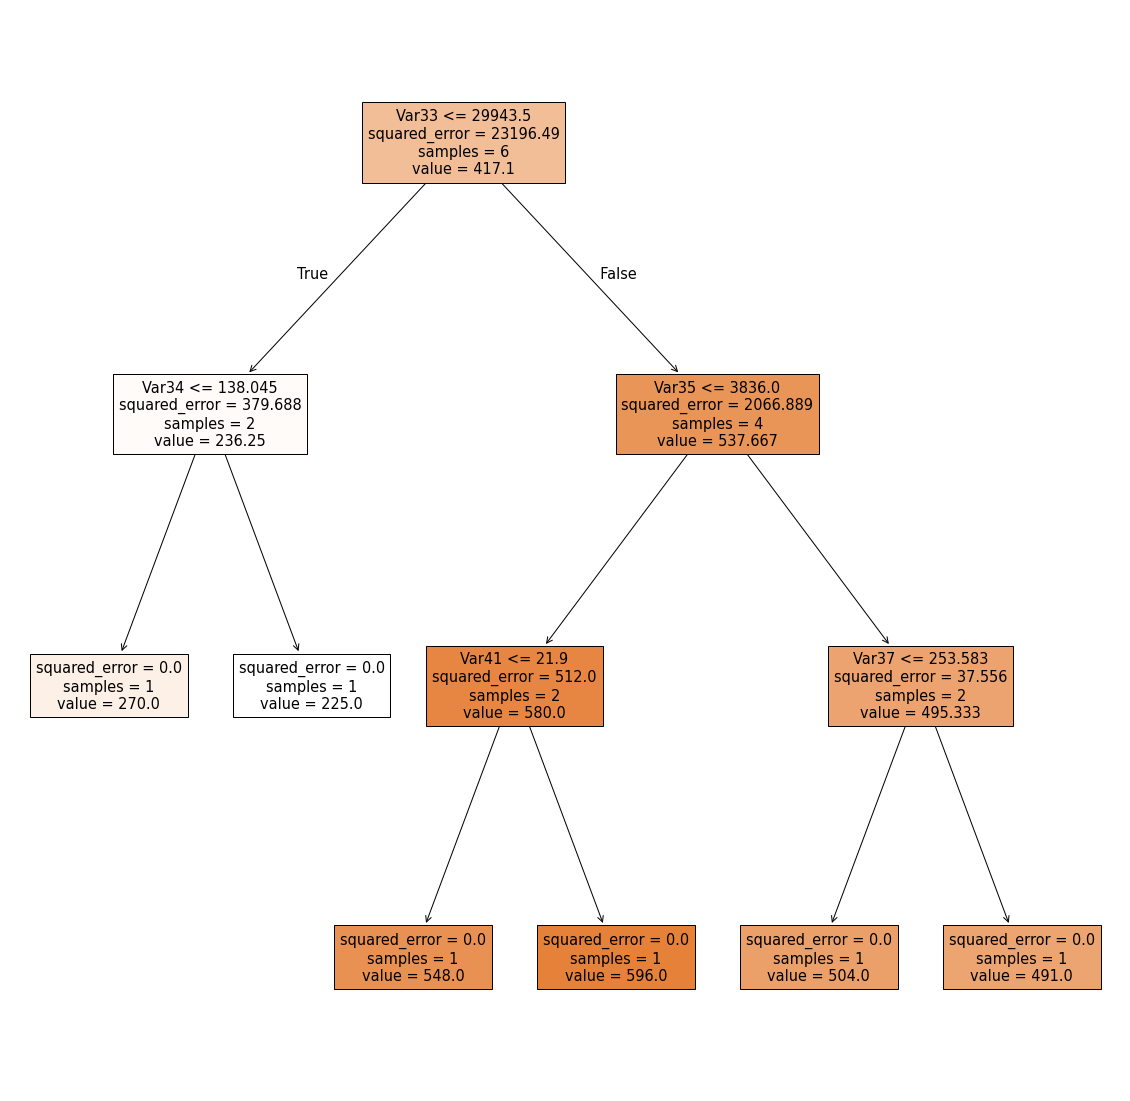

In [59]:
# 일부 샘플만을 이용해 랜덤 포레스트 트리 학습

from sklearn import tree

sample_select = 10

X_train_rfr = df_cat1_train[list(Category_variables)+Numeric_variables][0:int(sample_select)]
y_train_rfr = df_cat1_train[Target_variables][0:int(sample_select)]
X_test_rfr = df_cat1_test[list(Category_variables)+Numeric_variables][0:int(sample_select)]
y_test_rfr = df_cat1_test[Target_variables][0:int(sample_select)]

rfr_vis = RandomForestRegressor(max_depth=10, random_state=0)
rfr_vis.fit(X_train_rfr, y_train_rfr)
y_preds_rfr = rfr_vis.predict(X_test_rfr)
mse = mean_squared_error(y_test_rfr, y_preds_rfr)
rmse = np.sqrt(mse)

print("MSE")
print(mse)
print("RMSE")
print(rmse)

# 랜덤 포레스트 개별 결정 트리 중 하나를 시각화하는 코드

plt.figure(figsize=(20,20))

_ = tree.plot_tree(rfr_vis.estimators_[2], feature_names=X_test_rfr.columns, filled=True)

In [60]:
# AdaboostRegression 활용하기

from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(n_estimators = 100, random_state=0)
ada.fit(df_cat1_train[list(Category_variables)+Numeric_variables],
        df_cat1_train[Target_variables])
ada_train_predict = ada.predict(df_cat1_train[list(Category_variables)+Numeric_variables])
ada_vald_predict = ada.predict(df_cat1_vald[list(Category_variables)+Numeric_variables])
ada_test_predict = ada.predict(df_cat1_test[list(Category_variables)+Numeric_variables])

c:\Users\DANIK\anaconda3\envs\diwork_latest\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [61]:
print("MSE")
print(mean_squared_error(ada_test_predict,df_cat1_test[Target_variables]))
print("RMSE")
print(np.sqrt(mean_squared_error(ada_test_predict,df_cat1_test[Target_variables])))
print("R_score")
print(r2_score(ada_test_predict,df_cat1_test[Target_variables]))

MSE
960.5525879950644
RMSE
30.99278283721977
R_score
0.8862671981865852


#  분석 결과 시각화

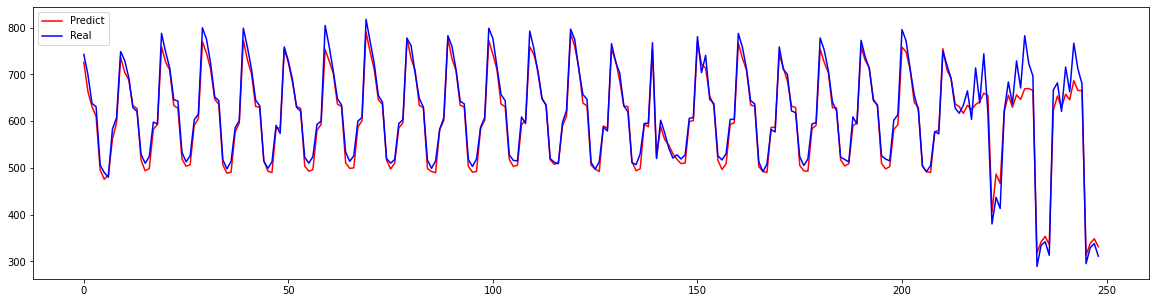

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(test_predict, c = 'r', label = 'Predict')
plt.plot(df_cat1_test[Target_variables], c='b', label = 'Real')
plt.legend()

### 인덱스 200번 이후의 그래프는 이상치 아닌가? 다른 온도에서도 비슷한 패턴인지 확인이 필요

In [65]:
df_cat1_test[Target_variables]

,Target
0,743.0
1,700.0
2,638.0
3,631.0
4,506.0
...,...
244,680.0
245,295.0
246,329.0
247,338.0


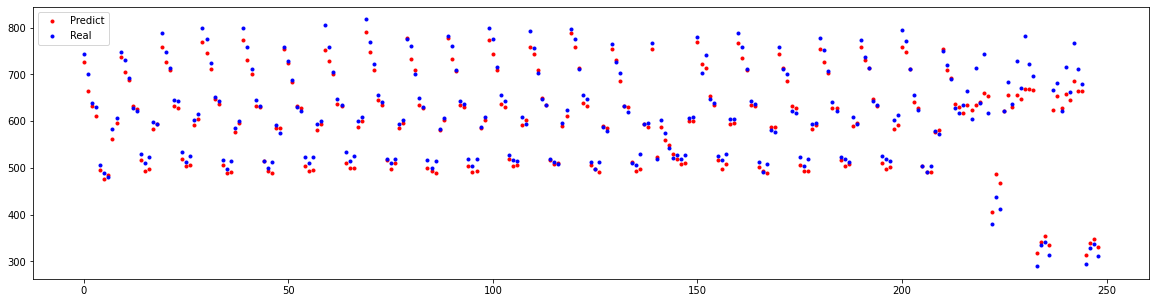

In [63]:
plt.figure(figsize=(20,5))
plt.scatter(range(0,len(df_cat1_test)), test_predict, marker = '.', c = 'red', label = 'Predict')
plt.scatter(range(0,len(df_cat1_test)), df_cat1_test[Target_variables], marker = '.', c = 'b', label = 'Real')
plt.legend()